<a href="https://colab.research.google.com/github/SeoJiWon1/Mask-detection/blob/main/Mask_Detection_model(ResNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask Detector Train

## Import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

## Image_datasets / data_loader 

# 데이터셋 불러오기
# Dataset

우선 데이터셋을 먼저 살펴보면, 샘플 데이터와 레이블(label) 또는 정답 데이터를 저장하는 역할을 수행한다.

한마디로 학습(Train) 데이터셋과 학습을 통해 산출된 결과 데이터셋을 다루는 역할을 담당한다는 것이다.

PyTorch Dataset을 통해서 이미지, 텍스트, 오디오 데이터셋을 다룰 수 있다.

# Dataloader

데이터로더는 데이터셋에 접근하는 역할을 수행한다.

데이터 로더를 통해서 데이터셋에 대한 import와 export를 모두 할 수 있다.

* torch.utils.data
    * 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르고 섞는 데 쓰는 도구들이 들어있는 모습
    * 파이토치 모델을 학습시키기 위한 데이터셋의 표준을 torch.utils.data.Dataset에 정의
    * Dataset 모듈을 상속하는 파생 클래스는 학습에 필요한 데이터를 로딩해주는 torch.utils.data.DataLoader 인스턴스의 입력으로 사용할 수 있음
* torchvision.datasets
    * torch.utils.data.Dataset을 상속하는 이미지 데이터셋의 모음. 패션 아이템 데이터셋이 바로 여기에 들어있음
* torchvision.transforms
    * 이미지 데이터셋에 쓸 수 있는 여러 가지 변환 필터를 담고 있는 모듈.
    * 예를 들어 텐서로 변환한다든지, 크기 조절(resize)과 크롭(crop)으로 이미지를 수정할 수도 있고, 밝기(brightness), 대비(contrast) 등을 조절하는 데 사용될 수도 있음
* torchvision.utils
    * 이미지 데이터를 저장하고 시각화하기 위한 도구가 들어있는 모듈

## Train /  Test 이미지 폴더 불러오기

* 구글 드라이브에 이미지 zip 저장
* 구글 마운트
* unzip으로 폴더 해제

In [2]:
# !unzip /content/drive/MyDrive/DL/MASK/mask_train_test/mask_train.zip -d /content/drive/MyDrive/DL/MASK/mask_train_test

In [3]:
# !unzip /content/drive/MyDrive/DL/MASK/mask_train_test/mask_test.zip -d /content/drive/MyDrive/DL/MASK/mask_train_test

In [4]:
# !unzip /content/drive/MyDrive/DL/MASK/mask_train_test/train_mask2.zip -d /content/drive/MyDrive/DL/MASK/mask_train_test

In [5]:
# !unzip /content/drive/MyDrive/DL/MASK/mask_train_test/tset_mask2.zip -d /content/drive/MyDrive/DL/MASK/mask_train_test

In [6]:
import os

num_train_with_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/train/with_mask'))
num_train_without_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/train/without_mask'))
num_train2_with_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/train_mask2/with_mask'))
num_train2_without_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/train_mask2/without_mask'))
num_train = num_train_with_mask + num_train_without_mask + num_train2_with_mask + num_train2_without_mask

num_test_with_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/test/with_mask'))
num_test_without_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/test/without_mask'))
num_test2_with_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/test_mask2/with_mask'))
num_test2_without_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/test_mask2/without_mask'))
num_test = num_test_with_mask + num_test_without_mask + num_test2_with_mask + num_test2_without_mask

print(f'훈련데이터 마스크포함 개수 : {num_train_with_mask}')
print(f'훈련데이터 마스크없음 개수 : {num_train_without_mask}')
print(f'훈련데이터 마스크포함 개수 : {num_train2_with_mask}')
print(f'훈련데이터 마스크없음 개수 : {num_train2_without_mask}')

print(f'시험데이터 마스크포함 개수 : {num_test_with_mask}')
print(f'시험데이터 마스크없음 개수 : {num_test_without_mask}')
print(f'시험데이터 마스크포함 개수 : {num_test2_with_mask}')
print(f'시험데이터 마스크없음 개수 : {num_test2_without_mask}')


print(f'훈련데이터 개수: {num_train}')
print(f'시험데이터 개수: {num_test}')

훈련데이터 마스크포함 개수 : 3583
훈련데이터 마스크없음 개수 : 3685
훈련데이터 마스크포함 개수 : 2925
훈련데이터 마스크없음 개수 : 3028
시험데이터 마스크포함 개수 : 897
시험데이터 마스크없음 개수 : 572
시험데이터 마스크포함 개수 : 800
시험데이터 마스크없음 개수 : 475
훈련데이터 개수: 13221
시험데이터 개수: 2744


In [8]:
# !cp -r /content/drive/MyDrive/DL/MASK/mask_train_test/train_mask2/with_mask/* /content/drive/MyDrive/DL/MASK/mask_train_test/train/with_mask

^C


In [9]:
# num_train_with_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/train/with_mask'))
# print(num_train_with_mask)

3583


In [10]:
# !cp -r /content/drive/MyDrive/DL/MASK/mask_train_test/train_mask2/without_mask/* /content/drive/MyDrive/DL/MASK/mask_train_test/train/without_mask
# cp : copy 옮길 파일 /* -> 안에 있는 파일

In [ ]:
# !cp -r /content/drive/MyDrive/DL/MASK/mask_train_test/train_mask2/without_mask/* /content/drive/MyDrive/DL/MASK/mask_train_test/train/without_mask
# !cp -r /content/drive/MyDrive/DL/MASK/mask_train_test/test_mask2/with_mask/* /content/drive/MyDrive/DL/MASK/mask_train_test/test/with_mask
# !cp -r /content/drive/MyDrive/DL/MASK/mask_train_test/test_mask2/without_mask/* /content/drive/MyDrive/DL/MASK/mask_train_test/test/without_mask

In [ ]:
# num_train_without_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/train/without_mask'))
# print(num_train_without_mask)
# num_test_with_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/test/with_mask'))
# print(num_test_with_mask)
# num_test_without_mask = len(os.listdir('/content/drive/MyDrive/DL/MASK/mask_train_test/test/without_mask'))
# print(num_test_without_mask)

In [7]:
num_train_mask = num_train_with_mask + num_train_without_mask
num_test_mask = num_test_with_mask + num_test_without_mask
print(f'훈련 데이터 개수 = {num_train_mask}')
print(f'테스트 데이터 개수 = {num_test_mask}')

훈련 데이터 개수 = 7268
테스트 데이터 개수 = 1469


In [ ]:
# git에 있는 이미지 다운 
# https://downgit.github.io/#/home?url=https:%2F%2Fgithub.com%2Fprajnasb%2Fobservations%2Ftree%2Fmaster%2Fexperiements%2Fdest_folder%2Ftrain

In [ ]:
# 이미지를 텐서로 변환
# 토치비전의 transforms : 입력받은 이미지를 변환시키는 도구
# 기능을 추가하고 싶다 -> transforms.Compose() 함수 안의 리스트로 넣어주면 순서대로 변환
# transform = transforms.Compose([
#     transforms.ToTensor()
# ])

### Transform, feature 설정
transform || target_transform

Transforms에서 자주 쓰이는 기능
* ToTensor : 이미지를 파이토치 텐서로 변환
* Resize : 이미지 크기 조정
* Normalize : 주어진 평균과 표준편차를 이용하여 정규화
* RandomHorizontalFlip : 무작위로 이미지의 오른쪽과 왼쪽을 뒤집는 기능
* RandomCrop : 이미지를 무작위로 자르는 기능

In [8]:
# transform 설정
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [9]:
experiments_path = '/content/drive/MyDrive/DL/MASK/mask_train_test'

In [10]:
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [11]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 7267
    Root location: /content/drive/MyDrive/DL/MASK/mask_train_test/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [12]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 1469
    Root location: /content/drive/MyDrive/DL/MASK/mask_train_test/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

DataLoader 설정

In [13]:
from torch.utils.data import DataLoader

In [14]:
# torch.utils.data.DataLoader 인스턴스의 입력으로 사용할 수 있음

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=16, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
dataloaders 

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f286512f940>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f286512f490>}

## 환경설정

In [16]:
# GPU 사용 환경

torch.cuda.is_available() # 현재 컴퓨터(머신)에서 CUDA(GPU)를 사용할 수 있는지 확인
# 런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU

True

In [17]:
# 환경에 따라서 CPU / GPU 를 알아서 설정하게 하는 코드
USE_CUDA = torch.cuda.is_available()
USE_CUDA

True

In [18]:
# USE_CUDA가 True면 cuda를 입력해서, GPU 장치를 사용하고, 아니면 CPU를 쓰겠다
DEVICE = torch.device("cuda"if USE_CUDA else "cpu")
DEVICE

device(type='cuda')

In [19]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

In [20]:
dataset_sizes

{'train': 7267, 'test': 1469}

In [21]:
class_names = image_datasets['train'].classes

In [22]:
class_names

['with_mask', 'without_mask']

## Visualizing images

In [23]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [24]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

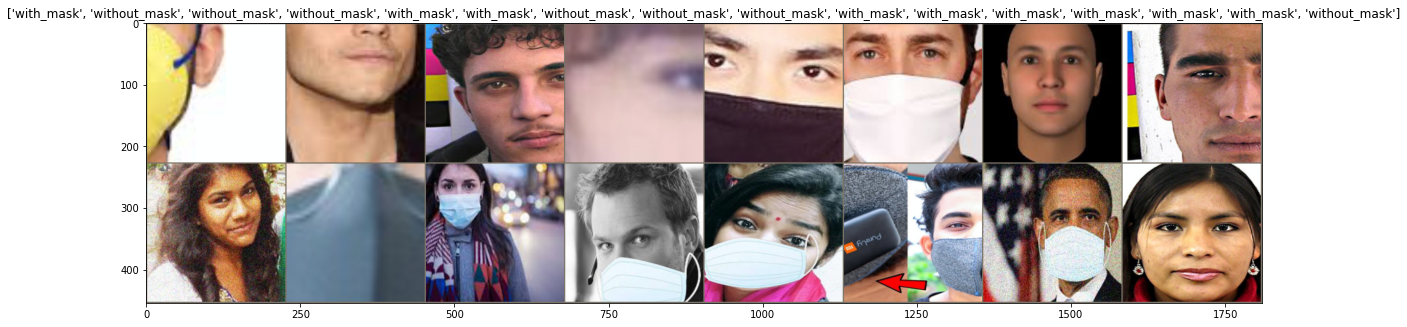

In [25]:
imshow(out, title=[class_names[x] for x in classes])

## Training Model
(손실함수, 옵티마이저 설정, 모델훈련)

### 모델훈련
https://9bow.github.io/PyTorch-tutorials-kr-0.3.1/beginner/transfer_learning_tutorial.html#id4 참조

In [26]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time() # 현재 시간을 나타냄
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
        
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)
                
                optimizer.zero_grad()
                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
            print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [27]:
import ssl

In [28]:
ssl._create_default_https_context = ssl._create_unverified_context

### 손실함수, 옵티마이저 설정

In [29]:
model_ft = models.resnet101(pretrained=True)

num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))

model_ft = model_ft.to(DEVICE)
criterion = nn.CrossEntropyLoss()

#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adagrad(model_ft.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [30]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.1625 Acc:0.9297

test Loss: 0.1408 Acc:0.9503

Epoch 1/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0977 Acc:0.9576

test Loss: 0.0196 Acc:0.9932

Epoch 2/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0790 Acc:0.9646

test Loss: 0.0065 Acc:0.9980

Epoch 3/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0667 Acc:0.9706

test Loss: 0.0216 Acc:0.9932

Epoch 4/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0617 Acc:0.9696

test Loss: 0.0090 Acc:0.9973

Epoch 5/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0623 Acc:0.9714

test Loss: 0.0065 Acc:0.9980

Epoch 6/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0569 Acc:0.9743

test Loss: 0.0052 Acc:0.9980

Epoch 7/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0470 Acc:0.9774

test Loss: 0.0044 Acc:0.9980

Epoch 8/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0466 Acc:0.9784

test Loss: 0.0037 Acc:0.9986

Epoch 9/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0472 Acc:0.9798

test Loss: 0.0028 Acc:0.9993

Epoch 10/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0443 Acc:0.9802

test Loss: 0.0036 Acc:0.9993

Epoch 11/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0478 Acc:0.9762

test Loss: 0.0025 Acc:0.9993

Epoch 12/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0452 Acc:0.9783

test Loss: 0.0023 Acc:0.9993

Epoch 13/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0473 Acc:0.9772

test Loss: 0.0026 Acc:0.9993

Epoch 14/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0472 Acc:0.9772

test Loss: 0.0027 Acc:0.9993

Epoch 15/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0488 Acc:0.9787

test Loss: 0.0025 Acc:0.9993

Epoch 16/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0466 Acc:0.9767

test Loss: 0.0028 Acc:0.9993

Epoch 17/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0526 Acc:0.9754

test Loss: 0.0031 Acc:0.9986

Epoch 18/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0462 Acc:0.9770

test Loss: 0.0029 Acc:0.9986

Epoch 19/19
----------


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train Loss: 0.0456 Acc:0.9776

test Loss: 0.0028 Acc:0.9993

Training complete in 55.000000m 7s
Best val acc: 0.999319


In [31]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    #fig = plt.figure(figsize=(10,10))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds,"predicitons")
            
            
            for j in range(inputs.size()[0]):
                images_so_far +=1
                #ax = plt.subplot(num_images//len(labels)-1, len(labels), images_so_far)
                #ax.axis('off')
                #ax.set_title('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                print('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                #imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [32]:
visualize_model(model_ft)

tensor([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0') predicitons
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask
true: without_mask predicted: without_mask
true: with_mask predicted: with_mask


In [33]:
torch.save(model_ft, '/content/drive/MyDrive/DL/MASK/mask_train_test/mask_detector_model.pt')    # 파이토치 모델 저장하는 방법 -> 모델경로 + 새로만들 파일명 + 확장자명